## Regularization

Linear Regression with L1 and L2 Regularization

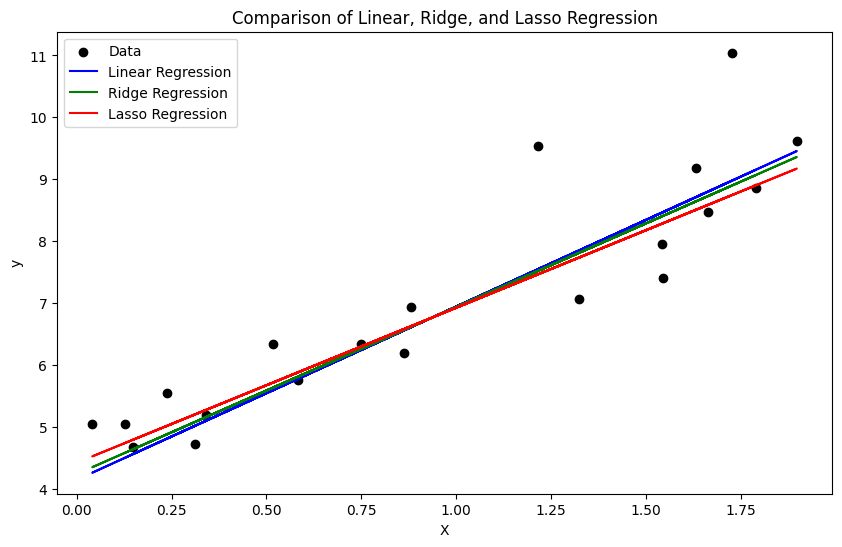

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1.0,random_state=42)  # alpha is the regularization strength (λ)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.1,random_state=42)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Data')
plt.plot(X_test, y_pred_lin, label='Linear Regression', color='blue')
plt.plot(X_test, y_pred_ridge, label='Ridge Regression', color='green')
plt.plot(X_test, y_pred_lasso, label='Lasso Regression', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Linear, Ridge, and Lasso Regression')
plt.legend()
plt.show()

## Cross-Validation

#### Example 1: Using Cross Validation for Model Selection

In [3]:
from sklearn.model_selection import cross_val_score

# Define a Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Perform 5-fold cross validation
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Convert negative MSE to positive values

print("MSE scores for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

MSE scores for each fold: [0.58328571 0.76343468 1.04387018 0.88061585 1.00466652]
Average MSE: 0.8551745887541106


**Explanation:**
- The cross_val_score function is used to perform 5-fold cross validation on the entire dataset.
- Negative mean squared error is used as the scoring metric (scikit-learn returns negative values for losses).
- The average MSE gives an indication of the model’s performance on unseen data.

### Interpretation of the MSE Scores
1. Understanding the MSE Values Per Fold
- The cross_val_score function was used with 5-fold cross validation, meaning the dataset was split into 5 equal parts (folds).
- For each fold, the model was trained on 4 parts and tested on the remaining 1 part.
- The Mean Squared Error (MSE) was calculated for each fold as follows:
        * Fold 1: 0.5833
        * Fold 2: 0.7634
        * Fold 3: 1.0439
        * Fold 4: 0.8806
        * Fold 5: 1.0047
- Lower MSE values indicate better model performance.
2. Interpretation of the Average MSE
- The average MSE across all folds is 0.8552.
- This means that, on average, the model makes an error of approximately 0.8552 units when predicting the target variable.
- If the target variable has large values, this error might be acceptable; if the values are small, this might indicate poor performance.
3. Variance in MSE Scores Across Folds
- The variation in the MSE scores suggests that the model's performance differs depending on the training data split.
- The lowest MSE is 0.5833 (best case), while the highest is 1.0439 (worst case).
- A large variation may indicate that the model is sensitive to different subsets of the data, which might suggest overfitting or an imbalanced dataset.
4. Next Steps
- If the MSE variation is too high, consider:
    * Increasing the number of folds (e.g., using 10-fold cross validation).
    * Checking for data imbalance or outliers.
    * Applying feature engineering or regularization to improve generalization.
- If the average MSE is too high, consider:
    * Trying different models (e.g., polynomial regression, ensemble methods).
    * Tuning hyperparameters using GridSearchCV or RandomizedSearchCV.
    * Adding more features or removing irrelevant ones.

### Example 2: Hyperparameter Tuning with GridSearchCV

In [4]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Setup the grid search with cross validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validated MSE:", -grid_search.best_score_)

Best alpha: 0.1
Best cross-validated MSE: 0.8533500306879223


**Explanation:**
- A grid of alpha values (regularization strengths) is defined.
- GridSearchCV tests each value using 5-fold cross validation.
- The best alpha value is selected based on the lowest cross-validated MSE.

## Class Imbalance

**Ensemble Techniques:**

Use ensemble methods like Random Forests or Gradient Boosted Trees to learn signals from both classes effectively.

In [1]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Generate imbalanced data
X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000)

# Apply SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       227
           1       0.98      0.98      0.98       221

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



## Multicollinearity

In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example dataset
data = pd.DataFrame({
    'X1': np.random.rand(100),
    'X2': np.random.rand(100) * 0.8,
    'X3': np.random.rand(100) + np.random.rand(100) * 0.5
})

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(vif_data)

  Feature       VIF
0      X1  3.420899
1      X2  3.187905
2      X3  3.358355


## Label Encoding

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']})

# Label Encoding
label_encoder = LabelEncoder()
data['Color_Label'] = label_encoder.fit_transform(data['Color'])

# One-Hot Encoding
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(data[['Color']]).toarray()

print("Label Encoded Data:\n", data)
print("One-Hot Encoded Data:\n", encoded_data)

Label Encoded Data:
    Color  Color_Label
0    Red            2
1  Green            1
2   Blue            0
3  Green            1
4    Red            2
One-Hot Encoded Data:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Normalization

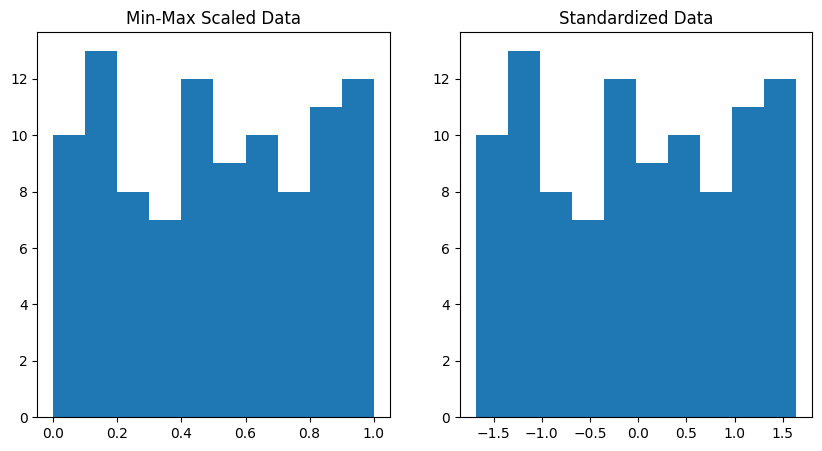

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = np.random.randint(0, 1000, (100,))
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

data_minmax_scaled = scaler_minmax.fit_transform(data.reshape(-1, 1))
data_standard_scaled = scaler_standard.fit_transform(data.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data_minmax_scaled)
plt.title("Min-Max Scaled Data")

plt.subplot(1, 2, 2)
plt.hist(data_standard_scaled)
plt.title("Standardized Data")
plt.show()